<a href="https://colab.research.google.com/github/hrbae/LG_AI_training/blob/main/M2_System%20Optimization%20by%20ML/Online%20Learning%20Practice/online_logistic_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 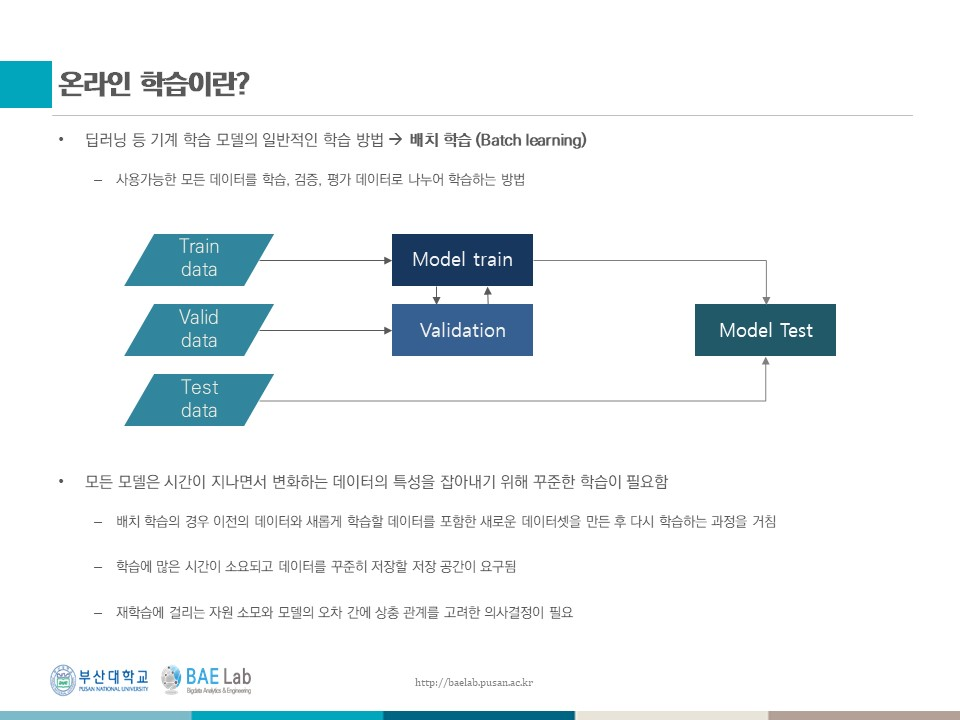

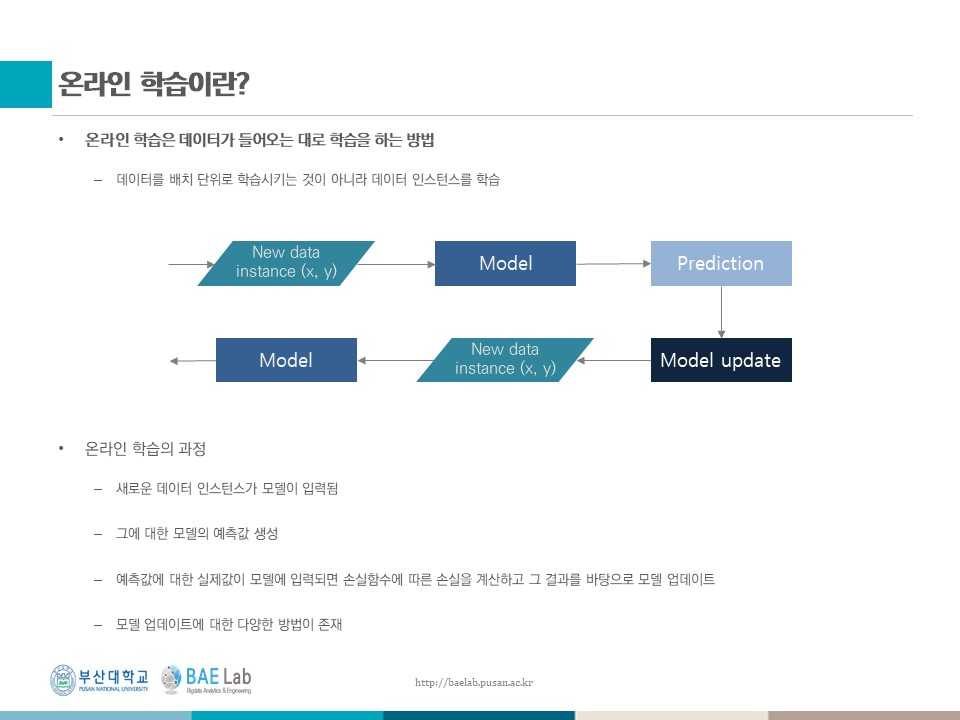

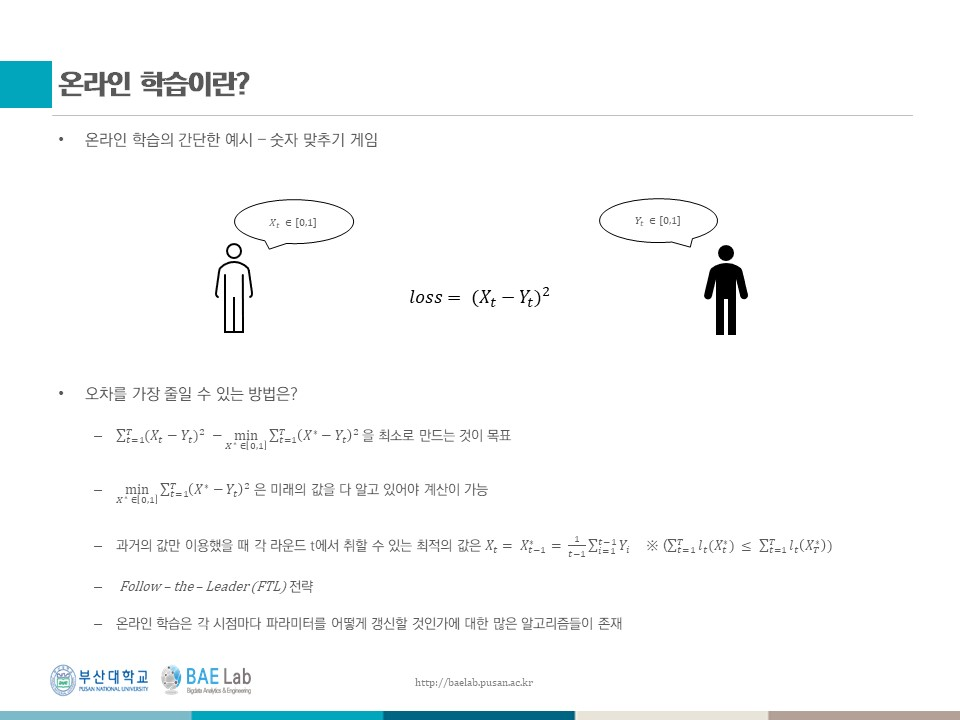

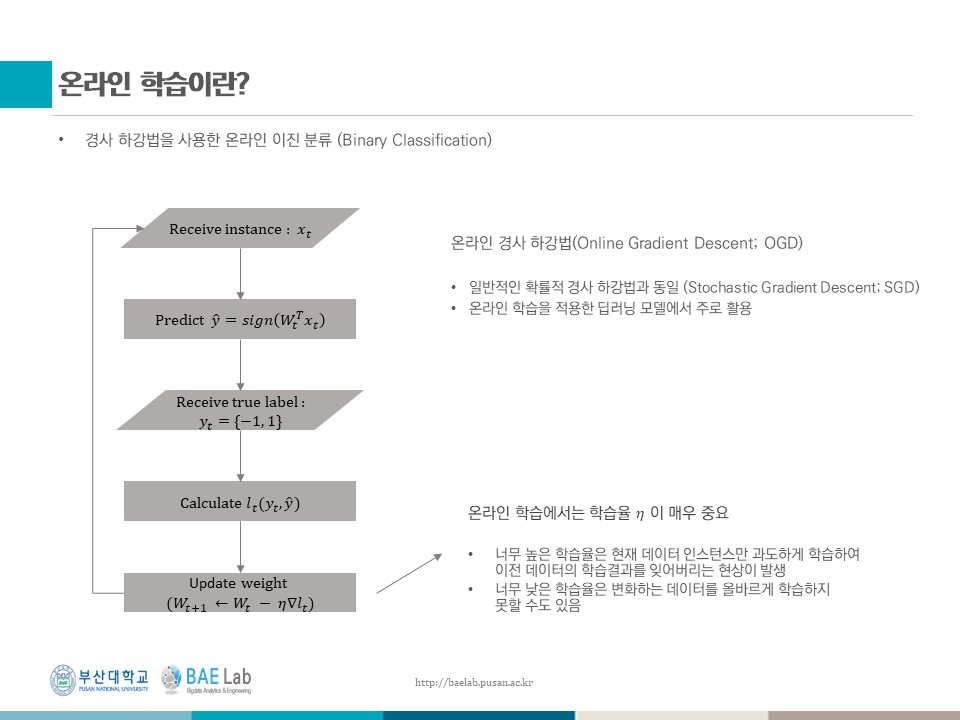

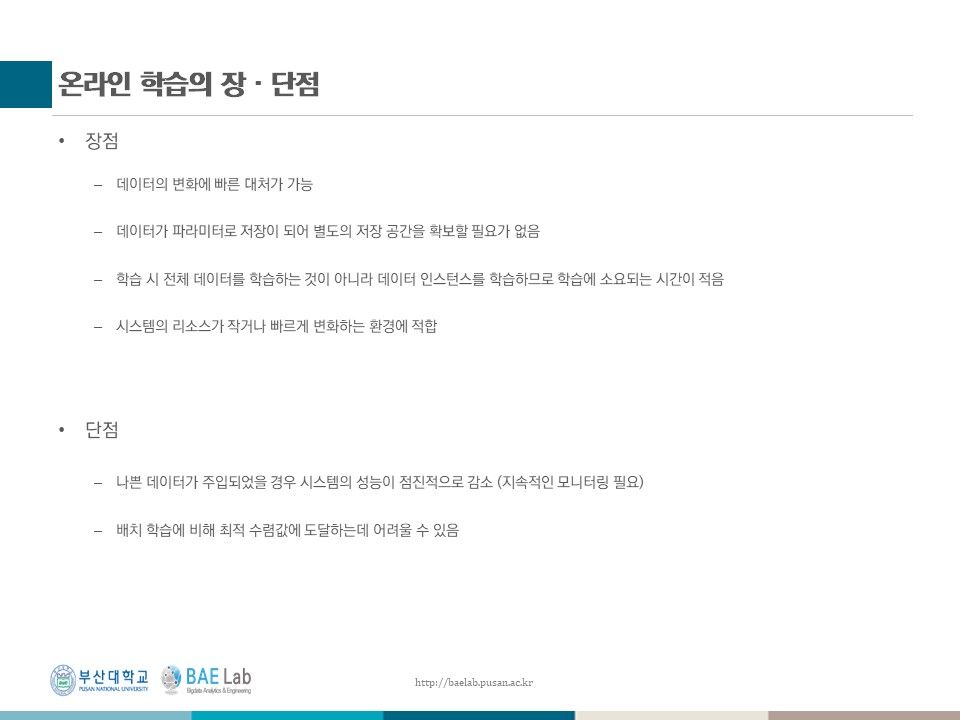

# 온라인 학습을 적용한 로지스틱 회귀 모델 예제

## 로지스틱 회귀 모델 구성하기

> SGD를 이용해 파라미터 갱신 (Pytorch 활용)

> 로지스틱 회귀 수식

>> 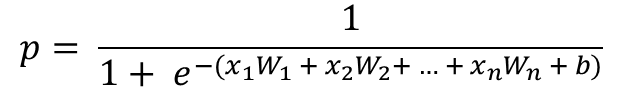

> BCE (Binary Cross Entropy) 손실 함수

>> 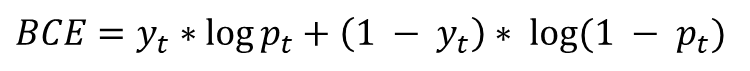

In [ ]:
import torch
import torch.nn as nn

# 로지스틱 회귀 모델 정의
class logistic_regression:
  
  # 초기화
  def __init__(self,w_shape):
    
    # 파라미터와 편향 정의 (0으로 초기화)
    self.W = torch.zeros((w_shape, 1), requires_grad=True).float()
    self.bias = torch.zeros((1), requires_grad=True).float()
    
    # 손실함수는 BCE loss 함수로 정의
    self.loss_fn = nn.BCELoss()

  # 로지스틱 함수를 활용해 확률 계산
  def calculate_prob(self, x):
    prob = 1 / (1 + torch.exp(-(x.matmul(self.W) + self.bias)))
    return prob

  # 온라인 학습 방식으로 학습하기 위한 함수
  def online_logistic(self, x, y, lr):
    
    # Pytorch에서 제공하는 SGD 옵티마이저를 사용해 파라미터 갱신
    optimizer = torch.optim.SGD([self.W, self.bias], lr = lr)
    optimizer.zero_grad()

    # 데이터 인스턴스에 대한 확률 계산
    prob = self.calculate_prob(x)

    # 확률과 y 사이의 손실 계산
    loss = self.loss_fn(prob, y)

    # 역전파
    loss.backward()

    #파라미터 갱신
    optimizer.step()

    return prob, loss.item(), self.W, self.bias

## 데이터 전처리

### 모든 데이터를 사용한 예제
#### 실제 데이터 분석 시에는 일부 컬럼을 추출하여 사용하는 과정을 거침

> 범주형 데이터는 label encoder를 사용하여 숫자로 변환

> 수치형 데이터는 min-max 스케일링을 사용하여 표준화

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('example.csv', index_col=0)
print(data)
data_processed = data.copy()

# label encoding
le = LabelEncoder()

for c_name in ['gender', 'Partner', 'Dependents', 'PhoneService',
                'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']:
    data_processed[c_name] = le.fit_transform(data_processed[c_name])

# minmax scaling
def min_max(data):
    minimum = data.min()
    maximum = data.max()
    return data.sub(minimum).div(maximum - minimum)
    
# 수치형 데이터 결측치 처리
data_processed['TotalCharges'].replace(" ", 0, inplace = True)
data_processed['TotalCharges'] = data_processed['TotalCharges'].astype(float)

# min-max 스케일링
for c_name in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    data_processed[c_name] = min_max(data_processed[c_name])

print(data_processed)

            gender  SeniorCitizen Partner  ... MonthlyCharges  TotalCharges Churn
customerID                                 ...                                   
7590-VHVEG  Female              0     Yes  ...          29.85         29.85    No
5575-GNVDE    Male              0      No  ...          56.95        1889.5    No
3668-QPYBK    Male              0      No  ...          53.85        108.15   Yes
7795-CFOCW    Male              0      No  ...          42.30       1840.75    No
9237-HQITU  Female              0      No  ...          70.70        151.65   Yes
...            ...            ...     ...  ...            ...           ...   ...
6840-RESVB    Male              0     Yes  ...          84.80        1990.5    No
2234-XADUH  Female              0     Yes  ...         103.20        7362.9    No
4801-JZAZL  Female              0     Yes  ...          29.60        346.45    No
8361-LTMKD    Male              1     Yes  ...          74.40         306.6   Yes
3186-AJIEK    Ma

## 로지스틱 회귀 모델의 학습

### 온라인 학습 결과 확인

In [ ]:
# X, Y 데이터 정의
data_x = data_processed.iloc[:, :-1].to_numpy()
data_y = data_processed.iloc[:, -1].to_numpy()

# 학습율 정의
learning_rate = 0.01

# 로지스틱 회귀 모델 생성
code

# 처음 데이터 학습 후 파라미터 변화
x = torch.tensor(data_x[0]).float()
y = torch.tensor([data_y[0]]).float()
code
print(prob, loss, W, bias)

# 두 번째 데이터 학습 후 파라미터 변화
x = torch.tensor(data_x[1]).float()
y = torch.tensor([data_y[1]]).float()
code
print(prob, loss, W, bias)

tensor([0.5000], grad_fn=<MulBackward0>) 0.6931471824645996 tensor([[ 0.0000e+00],
        [ 0.0000e+00],
        [-5.0000e-03],
        [ 0.0000e+00],
        [-6.9444e-05],
        [ 0.0000e+00],
        [-5.0000e-03],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [-1.0000e-02],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [-5.0000e-03],
        [-1.0000e-02],
        [-5.7711e-04],
        [-1.7185e-05]], requires_grad=True) tensor([-0.0050], requires_grad=True)
tensor([0.4912], grad_fn=<MulBackward0>) 0.675673246383667 tensor([[-0.0049],
        [ 0.0000],
        [-0.0050],
        [ 0.0000],
        [-0.0024],
        [-0.0049],
        [-0.0050],
        [ 0.0000],
        [-0.0098],
        [-0.0100],
        [-0.0098],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0049],
        [-0.0050],
        [-0.0247],
        [-0.0025],
        [-0.0011]], requires_grad=True) ten

### 전체 데이터에 대한 온라인 학습

In [ ]:
# X, Y 데이터 정의
data_x = data_processed.iloc[:, :-1].to_numpy()
data_y = data_processed.iloc[:, -1].to_numpy()

# 학습율 정의
learning_rate = 0.01

# 로지스틱 회귀 모델
model = logistic_regression(data_x.shape[1])

correct = 0
for i in range(data_x.shape[0]):
    x = torch.tensor(data_x[i]).float()
    y = torch.tensor([data_y[i]]).float()
    code
    if prob >= 0.5 and y == 1:
        correct += 1
    elif prob < 0.5 and y == 0:
        correct += 1

# 정확도 계산 
acc = correct / data_x.shape[0] * 100
print(acc)

77.5947749538549
